## **Linear Regression**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV


In [7]:
# Set random seed for reproducibility
np.random.seed(42)

In [6]:
# Configure matplotlib for better plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

Part 1: Simple Linear Regression
-------------------------------
Model parameters:
Coefficient (slope): 1.9869
Intercept: 1.1804
Mean Squared Error: 0.8669
R-squared score: 0.9751


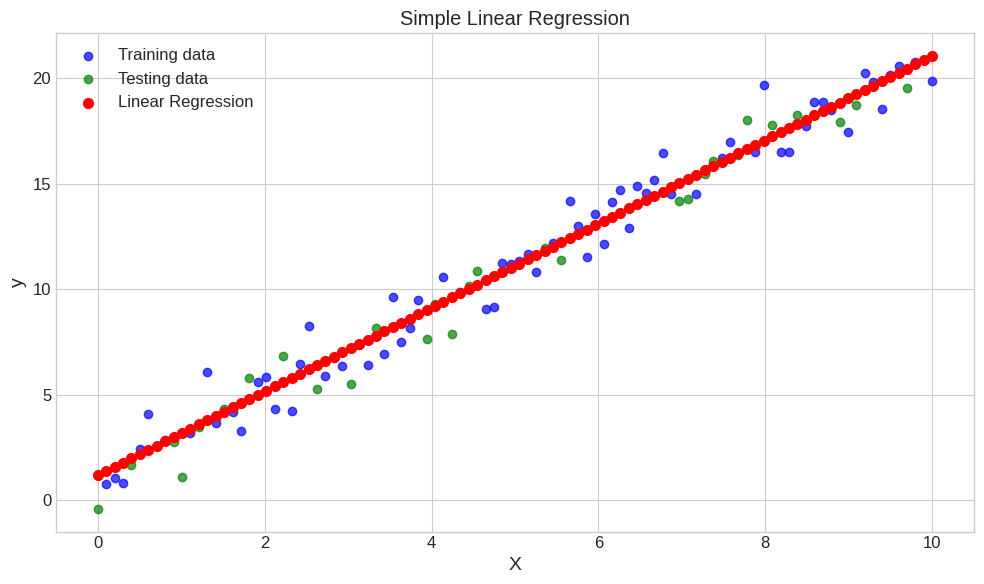

In [9]:
print("Part 1: Simple Linear Regression")
print("-------------------------------")

# Create a simple syntnetic dataset
X_simple = np.linspace(0,10,100).reshape(-1,1)
y_simple = 2* X_simple.ravel() + 1 + np.random.normal(0,1,100)

# Split the data
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.3, random_state=42)

# Train a linear regression model
lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train_simple)

# Make Prediction
y_pred_simple = lr_simple.predict(X_test_simple)

# Print model parameters
print(f"Model parameters:")
print(f"Coefficient (slope): {lr_simple.coef_[0]:.4f}")
print(f"Intercept: {lr_simple.intercept_:.4f}")

# Evaluate the model
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)
print(f"Mean Squared Error: {mse_simple:.4f}")
print(f"R-squared score: {r2_simple:.4f}")

# Visualize the results
plt.figure(figsize=(10,6))
plt.scatter(X_train_simple,
            y_train_simple,
            color = 'blue', alpha=0.7,
            label='Training data')
plt.scatter(X_test_simple,
            y_test_simple,
            color = 'green', alpha=0.7,
            label='Testing data')
plt.scatter(X_simple,
            lr_simple.predict(X_simple),
            color = 'red', linewidth=2,
            label='Linear Regression')
plt.title('Simple Linear Regression')
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



**Multiple Linear Regression with California Housing Dataset**

In [12]:
print("\nPart 2: Multiple Linear Regression with California Housing Dataset")
print("---------------------------------------------------------------")

# Load the california Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names

# Print basic dataset information
print(f"Dataset shape: {X.shape}")
print(f"Feature names: {feature_names}")
print(f"Target: {california.DESCR.split('Attribute Information')[0].split('.')[-2]}")

# Basic statistics
print("\nBasic statistics fo features:")
california_df = pd.DataFrame(X, columns=feature_names)
print(california_df.describe().round(2))

# Basic statistics for target
print("\nBasic statistics for target (housing price):")
print(pd.Series(y).describe().round(2))

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Train a multiple linear regression models
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make Predictions
y_pred =lr.predict(X_test)

# Evaluate the models
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nModel evaluation:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Print Coefficients
print("\nModel Coefficients:")
for feature, coef in zip(feature_names, lr.coef_):
  print(f"{feature}:{coef:.6f}")
print(f"Intercept: {lr.intercept_:.6f}")



Part 2: Multiple Linear Regression with California Housing Dataset
---------------------------------------------------------------
Dataset shape: (20640, 8)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: 

Basic statistics fo features:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00  20640.00   20640.00
mean       3.87     28.64      5.43       1.10     1425.48      3.07     35.63    -119.57
std        1.90     12.59      2.47       0.47     1132.46     10.39      2.14       2.00
min        0.50      1.00      0.85       0.33        3.00      0.69     32.54    -124.35
25%        2.56     18.00      4.44       1.01      787.00      2.43     33.93    -121.80
50%        3.53     29.00      5.23       1.05     1166.00      2.82     34.26    -118.49
75%        4.74     37.00      6.05       1.10     1725.00

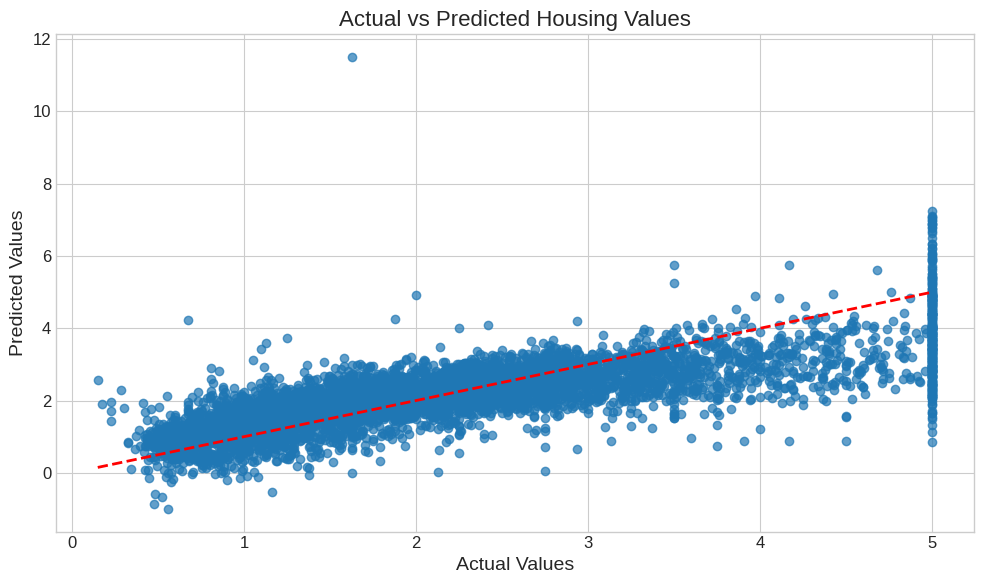

In [13]:
# Visualize actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(),y.max()],[y.min(),y.max()], 'r--', lw=2)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Housing Values', fontsize=16)
plt.tight_layout()
plt.show()

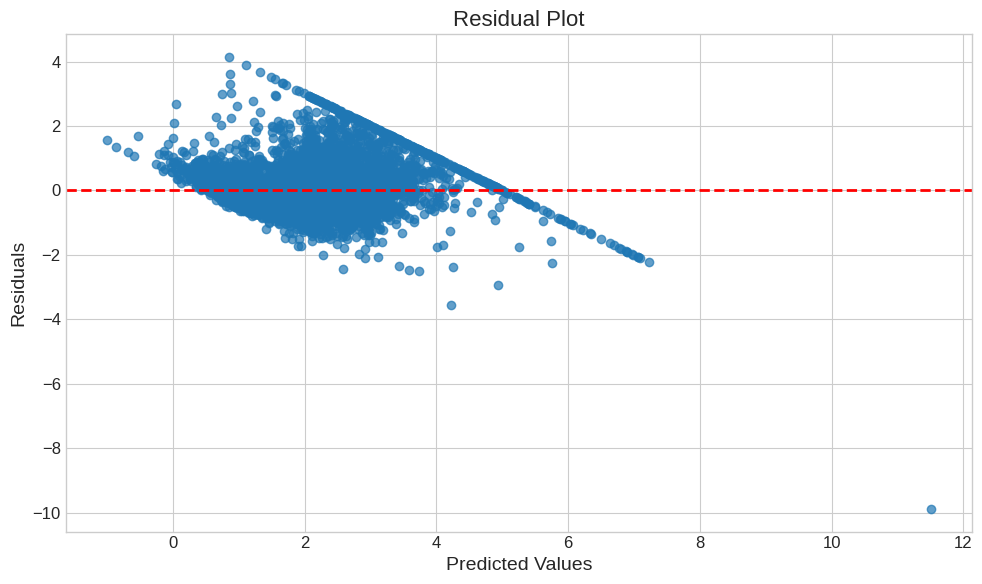

In [14]:
# Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot', fontsize=16)
plt.tight_layout()
plt.show()

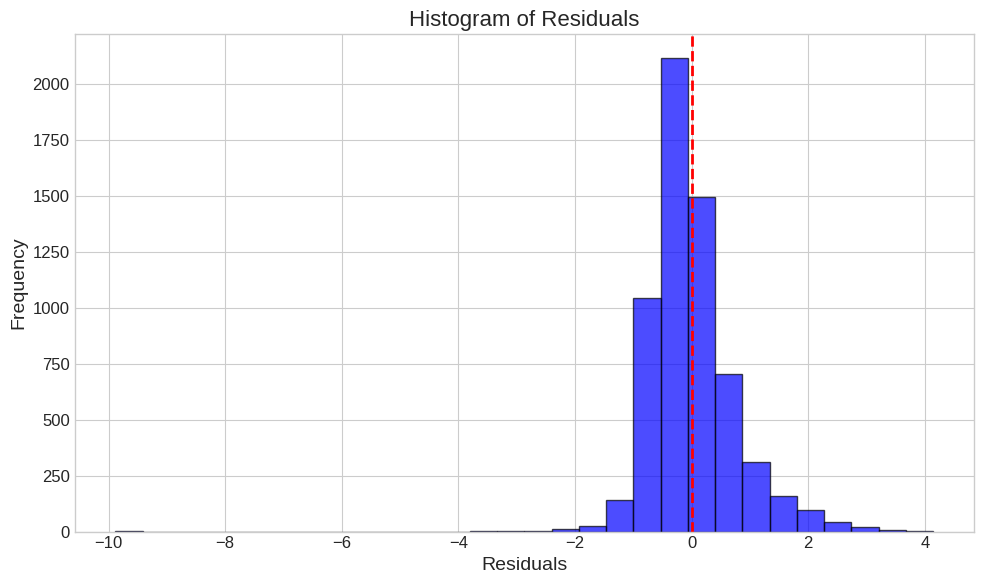

In [15]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Residuals', fontsize=16)
plt.tight_layout()
plt.show()

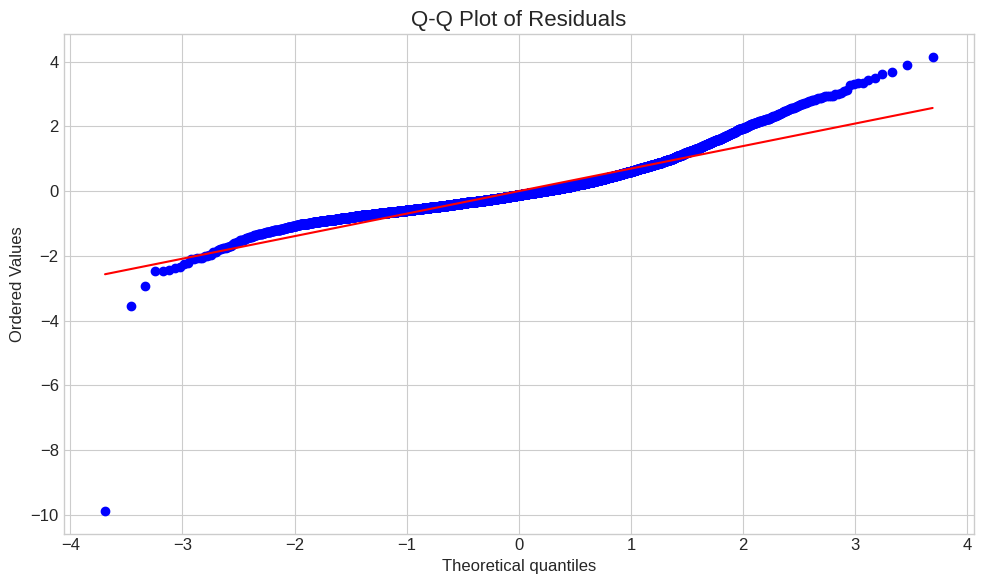

In [16]:
# QQ plot for checking normality of residuals
from scipy import stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals', fontsize=16)
plt.tight_layout()
plt.show()

**Feature Scaling and Preprocessing**


Part 3: Feature Scaling and Preprocessing
---------------------------------------
Model evaluation with feature scaling:
Mean Squared Error: 0.5306
R² Score: 0.5958
Improvement in MSE: 0.0000

Model coefficients after scaling:
MedInc: 0.849222
HouseAge: 0.122119
AveRooms: -0.299558
AveBedrms: 0.348410
Population: -0.000884
AveOccup: -0.041698
Latitude: -0.893856
Longitude: -0.868617


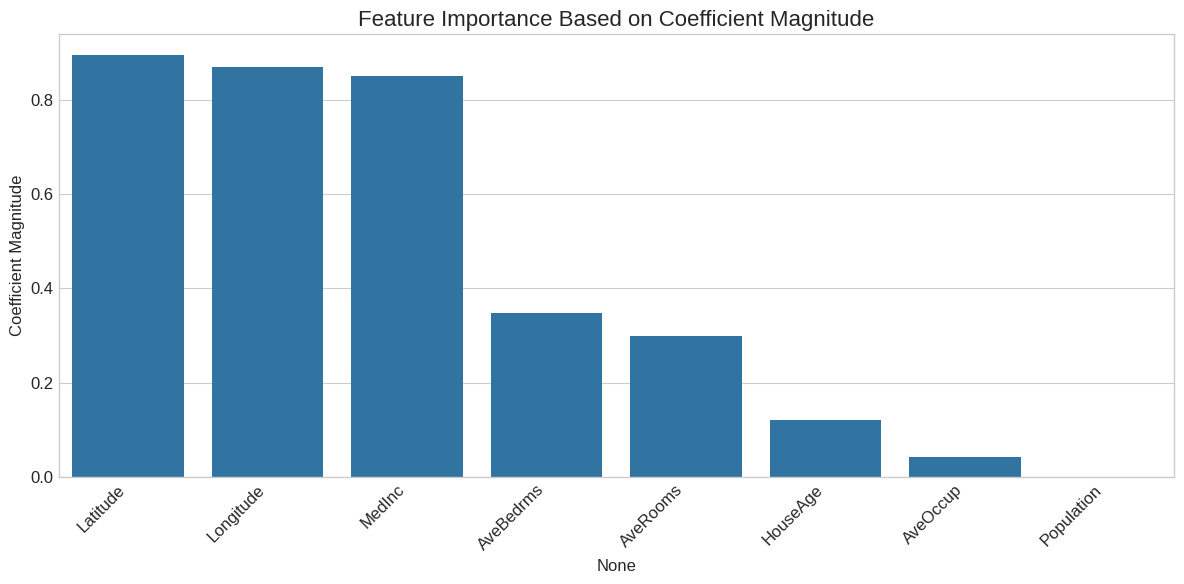

In [17]:
print("\nPart 3: Feature Scaling and Preprocessing")
print("---------------------------------------")

# Create a pipeline with preprocessing
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_scaled = pipeline.predict(X_test)

# Evaluate the model
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Model evaluation with feature scaling:")
print(f"Mean Squared Error: {mse_scaled:.4f}")
print(f"R² Score: {r2_scaled:.4f}")
print(f"Improvement in MSE: {mse - mse_scaled:.4f}")

# Coefficients after scaling
lr_scaled = pipeline.named_steps['regression']
scaler = pipeline.named_steps['scaler']
print("\nModel coefficients after scaling:")
for feature, coef in zip(feature_names, lr_scaled.coef_):
    print(f"{feature}: {coef:.6f}")

# Feature importance (absolute coefficient values)
coefs = pd.DataFrame(
    np.abs(lr_scaled.coef_),
    index=feature_names,
    columns=['Coefficient Magnitude']
)
coefs = coefs.sort_values('Coefficient Magnitude', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=coefs.index, y='Coefficient Magnitude', data=coefs)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance Based on Coefficient Magnitude', fontsize=16)
plt.tight_layout()
plt.show()

**Regularization Techniques**


Part 4: Regularization Techniques
------------------------------

Model comparison:
Linear Regression R²: 0.5958
Ridge Regression R²: 0.5958
Lasso Regression R²: 0.4935
ElasticNet Regression R²: 0.5276


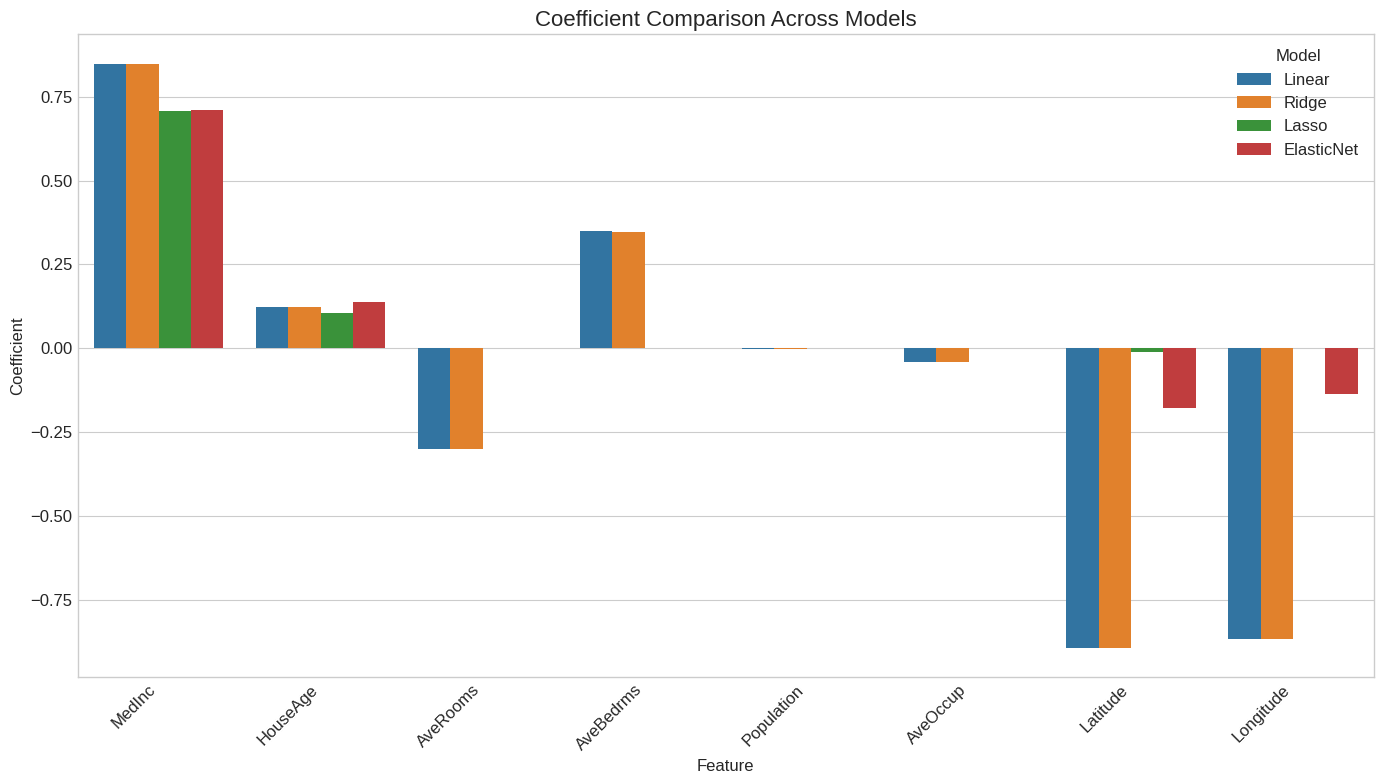

In [18]:
print("\nPart 4: Regularization Techniques")
print("------------------------------")

# Create a pipeline with different regularization techniques
# Ridge Regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

# Lasso Regression
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.1))
])

# ElasticNet Regression
elastic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic', ElasticNet(alpha=0.1, l1_ratio=0.5))
])

# Train models
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)
elastic_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_pipeline.predict(X_test)
y_pred_lasso = lasso_pipeline.predict(X_test)
y_pred_elastic = elastic_pipeline.predict(X_test)

# Evaluate models
print("\nModel comparison:")
print(f"Linear Regression R²: {r2_scaled:.4f}")
print(f"Ridge Regression R²: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"Lasso Regression R²: {r2_score(y_test, y_pred_lasso):.4f}")
print(f"ElasticNet Regression R²: {r2_score(y_test, y_pred_elastic):.4f}")

# Get coefficients
ridge_coef = ridge_pipeline.named_steps['ridge'].coef_
lasso_coef = lasso_pipeline.named_steps['lasso'].coef_
elastic_coef = elastic_pipeline.named_steps['elastic'].coef_

# Visualize coefficients from different models
coefs_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear': lr_scaled.coef_,
    'Ridge': ridge_coef,
    'Lasso': lasso_coef,
    'ElasticNet': elastic_coef
})

coefs_melted = pd.melt(
    coefs_df,
    id_vars='Feature',
    value_vars=['Linear', 'Ridge', 'Lasso', 'ElasticNet'],
    var_name='Model',
    value_name='Coefficient'
)

plt.figure(figsize=(14, 8))
sns.barplot(x='Feature', y='Coefficient', hue='Model', data=coefs_melted)
plt.xticks(rotation=45, ha='right')
plt.title('Coefficient Comparison Across Models', fontsize=16)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


**Hyperparameter Tuning**


Part 5: Hyperparameter Tuning
---------------------------

Best hyperparameters:
Ridge: {'ridge__alpha': 0.01}, MSE: 0.5268
Lasso: {'lasso__alpha': 0.001}, MSE: 0.5267
ElasticNet: {'elastic__alpha': 0.001, 'elastic__l1_ratio': 0.9}, MSE: 0.5267

Test set performance (R²):
Ridge: 0.5958
Lasso: 0.5964
ElasticNet: 0.5964


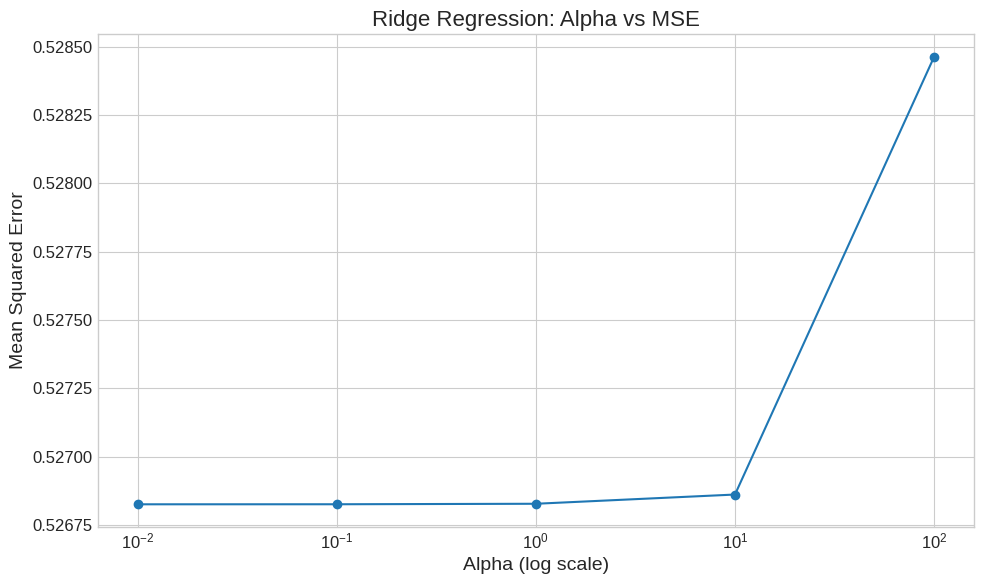

In [20]:
print("\nPart 5: Hyperparameter Tuning")
print("---------------------------")

# Define parameter grids
ridge_param_grid = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

lasso_param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

elastic_param_grid = {
    'elastic__alpha': [0.001, 0.01, 0.1, 1.0],
    'elastic__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Perform grid search
ridge_gs = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_gs = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
elastic_gs = GridSearchCV(elastic_pipeline, elastic_param_grid, cv=5, scoring='neg_mean_squared_error')

# Train models
ridge_gs.fit(X_train, y_train)
lasso_gs.fit(X_train, y_train)
elastic_gs.fit(X_train, y_train)

# Print best parameters
print("\nBest hyperparameters:")
print(f"Ridge: {ridge_gs.best_params_}, MSE: {-ridge_gs.best_score_:.4f}")
print(f"Lasso: {lasso_gs.best_params_}, MSE: {-lasso_gs.best_score_:.4f}")
print(f"ElasticNet: {elastic_gs.best_params_}, MSE: {-elastic_gs.best_score_:.4f}")

# Evaluate on test set
best_ridge = ridge_gs.best_estimator_
best_lasso = lasso_gs.best_estimator_
best_elastic = elastic_gs.best_estimator_

y_pred_best_ridge = best_ridge.predict(X_test)
y_pred_best_lasso = best_lasso.predict(X_test)
y_pred_best_elastic = best_elastic.predict(X_test)

# Calculate R² scores
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)
r2_best_elastic = r2_score(y_test, y_pred_best_elastic)

print("\nTest set performance (R²):")
print(f"Ridge: {r2_best_ridge:.4f}")
print(f"Lasso: {r2_best_lasso:.4f}")
print(f"ElasticNet: {r2_best_elastic:.4f}")

# Visualize alpha vs performance for Ridge
alphas = ridge_param_grid['ridge__alpha']
ridge_scores = []

for alpha in alphas:
    ridge = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])

    # Use cross-validation to get reliable score
    scores = cross_val_score(ridge, X_train, y_train,
                            cv=5, scoring='neg_mean_squared_error')
    ridge_scores.append(-np.mean(scores))

plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_scores, 'o-')
plt.xscale('log')
plt.xlabel('Alpha (log scale)', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Ridge Regression: Alpha vs MSE', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

**Feature Selection**


Part 6: Feature Selection
-----------------------
Selected features: ['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude']
R² with all features: 0.5958
R² with selected features: 0.5949


<ipython-input-21-de9d6fe86cea>:25: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)


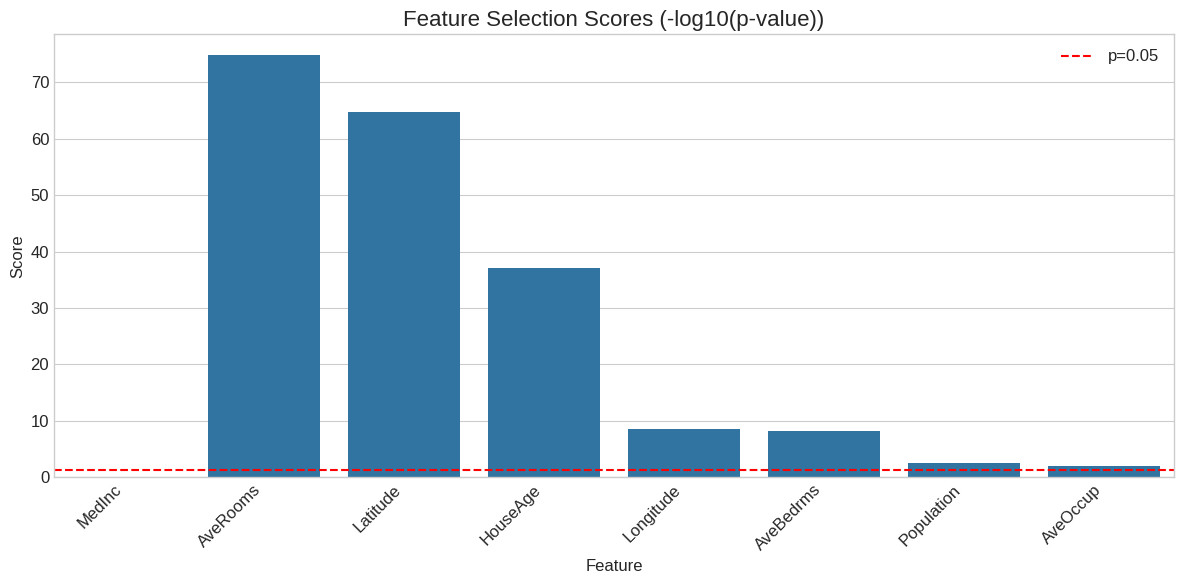

In [21]:
print("\nPart 6: Feature Selection")
print("-----------------------")

# Use SelectKBest for feature selection
selector = SelectKBest(f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = [feature_names[i] for i in selected_indices]

print(f"Selected features: {selected_features}")

# Train model on selected features
lr_selected = LinearRegression()
lr_selected.fit(X_train_selected, y_train)
y_pred_selected = lr_selected.predict(X_test_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"R² with all features: {r2:.4f}")
print(f"R² with selected features: {r2_selected:.4f}")

# Plot feature scores
scores = -np.log10(selector.pvalues_)
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores})
scores_df = scores_df.sort_values('Score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Score', data=scores_df)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--', label='p=0.05')
plt.title('Feature Selection Scores (-log10(p-value))', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

**Polynomial Regression**


Part 7: Polynomial Regression
---------------------------
Linear Regression R²: 0.5958
Polynomial Regression R²: 0.6534


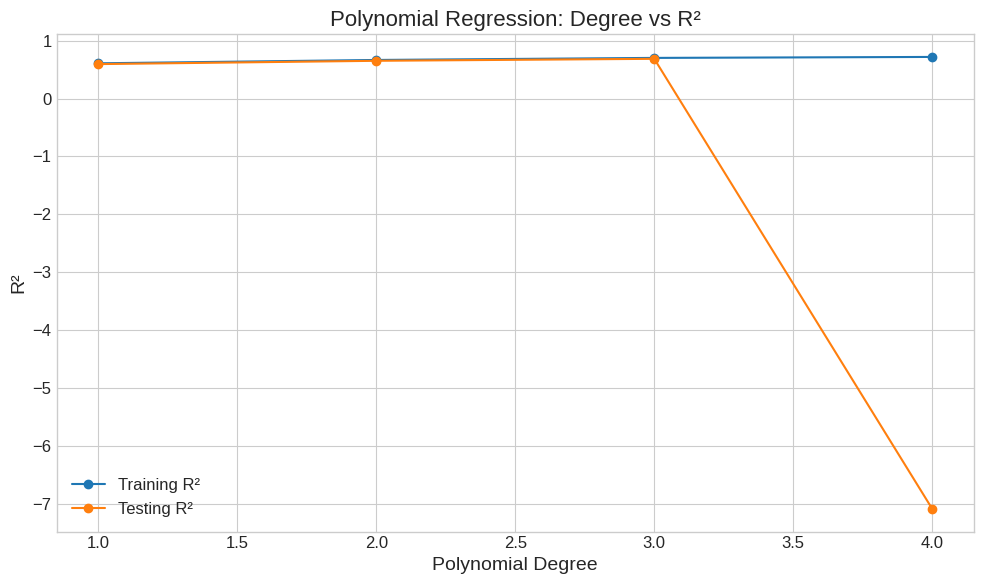

In [22]:
print("\nPart 7: Polynomial Regression")
print("---------------------------")

# Create a polynomial pipeline
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

# Train model
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Linear Regression R²: {r2:.4f}")
print(f"Polynomial Regression R²: {r2_poly:.4f}")

# Try different polynomial degrees
degrees = [1, 2, 3, 4]
train_scores = []
test_scores = []

for degree in degrees:
    poly_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('scaler', StandardScaler()),
        ('regression', Ridge(alpha=1.0))  # Using Ridge to prevent overfitting
    ])

    poly_pipeline.fit(X_train, y_train)

    # Score on training data
    train_score = poly_pipeline.score(X_train, y_train)
    train_scores.append(train_score)

    # Score on test data
    test_score = poly_pipeline.score(X_test, y_test)
    test_scores.append(test_score)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, 'o-', label='Training R²')
plt.plot(degrees, test_scores, 'o-', label='Testing R²')
plt.xlabel('Polynomial Degree', fontsize=14)
plt.ylabel('R²', fontsize=14)
plt.title('Polynomial Regression: Degree vs R²', fontsize=16)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Learning Curves**


Part 8: Learning Curves
--------------------


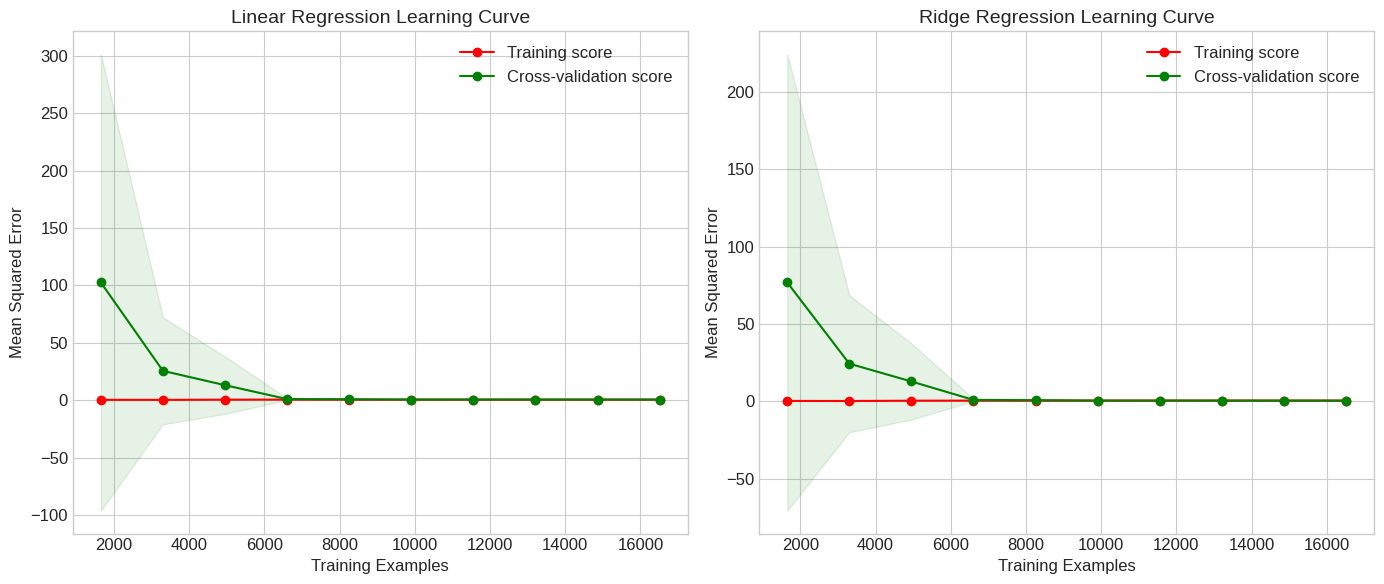

In [23]:
print("\nPart 8: Learning Curves")
print("--------------------")

# Generate learning curves
train_sizes = np.linspace(0.1, 1.0, 10)

# Linear Regression learning curve
lr_train_sizes, lr_train_scores, lr_test_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=train_sizes,
    scoring='neg_mean_squared_error', cv=5, n_jobs=-1
)

# Ridge Regression learning curve
ridge_train_sizes, ridge_train_scores, ridge_test_scores = learning_curve(
    Ridge(alpha=1.0), X, y, train_sizes=train_sizes,
    scoring='neg_mean_squared_error', cv=5, n_jobs=-1
)

# Convert MSE to positive for better visualization
lr_train_scores_mean = -np.mean(lr_train_scores, axis=1)
lr_train_scores_std = np.std(lr_train_scores, axis=1)
lr_test_scores_mean = -np.mean(lr_test_scores, axis=1)
lr_test_scores_std = np.std(lr_test_scores, axis=1)

ridge_train_scores_mean = -np.mean(ridge_train_scores, axis=1)
ridge_train_scores_std = np.std(ridge_train_scores, axis=1)
ridge_test_scores_mean = -np.mean(ridge_test_scores, axis=1)
ridge_test_scores_std = np.std(ridge_test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.fill_between(lr_train_sizes, lr_train_scores_mean - lr_train_scores_std,
                 lr_train_scores_mean + lr_train_scores_std, alpha=0.1, color="r")
plt.fill_between(lr_train_sizes, lr_test_scores_mean - lr_test_scores_std,
                 lr_test_scores_mean + lr_test_scores_std, alpha=0.1, color="g")
plt.plot(lr_train_sizes, lr_train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(lr_train_sizes, lr_test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Linear Regression Learning Curve", fontsize=14)
plt.xlabel("Training Examples", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.legend(loc="best")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.fill_between(ridge_train_sizes, ridge_train_scores_mean - ridge_train_scores_std,
                 ridge_train_scores_mean + ridge_train_scores_std, alpha=0.1, color="r")
plt.fill_between(ridge_train_sizes, ridge_test_scores_mean - ridge_test_scores_std,
                 ridge_test_scores_mean + ridge_test_scores_std, alpha=0.1, color="g")
plt.plot(ridge_train_sizes, ridge_train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(ridge_train_sizes, ridge_test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Ridge Regression Learning Curve", fontsize=14)
plt.xlabel("Training Examples", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.legend(loc="best")
plt.grid(True)

plt.tight_layout()
plt.show()

**Cross Validation**

In [24]:
print("\nPart 9: Cross-Validation")
print("---------------------")

# Perform k-fold cross-validation
from sklearn.model_selection import KFold

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name} CV RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")


Part 9: Cross-Validation
---------------------
Linear Regression CV RMSE: 0.7283 ± 0.0149
Ridge CV RMSE: 0.7282 ± 0.0149
Lasso CV RMSE: 0.8211 ± 0.0084
ElasticNet CV RMSE: 0.7935 ± 0.0094


## **Case Study: Diabetes Dataset**


Part 10: Case Study - Diabetes Dataset
-----------------------------------
Dataset shape: (442, 10)
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Mean Squared Error: 2995.2155
R² Score: 0.4452


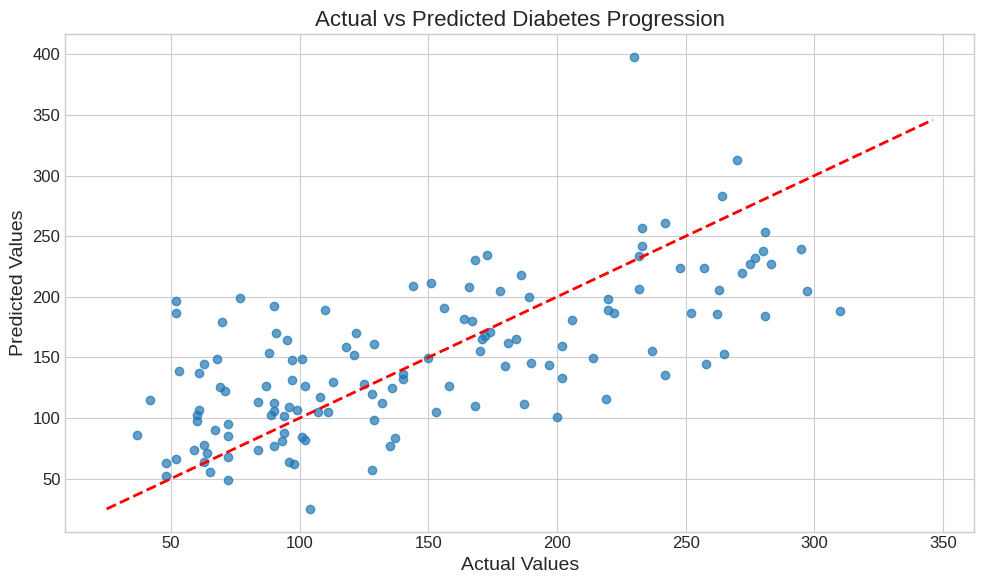

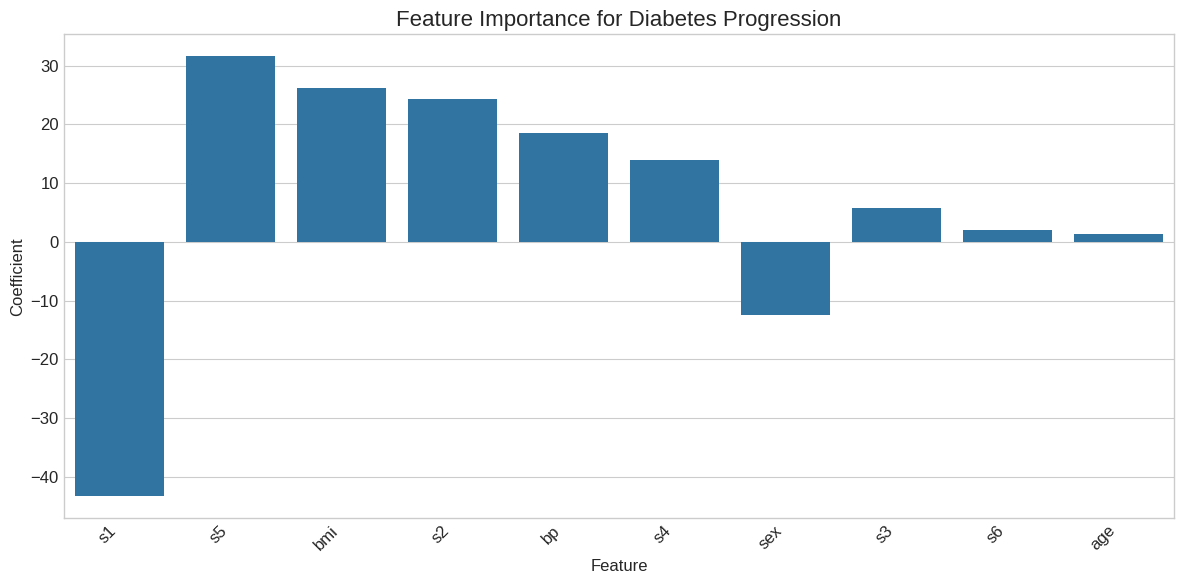

In [25]:
print("\nPart 10: Case Study - Diabetes Dataset")
print("-----------------------------------")

# Load the diabetes dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
feature_names_diabetes = diabetes.feature_names

print(f"Dataset shape: {X_diabetes.shape}")
print(f"Feature names: {feature_names_diabetes}")

# Split the data
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes, y_diabetes, test_size=0.3, random_state=42
)

# Create a pipeline with preprocessing and regularization
pipeline_diabetes = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regression', Ridge(alpha=1.0))
])

# Train the model
pipeline_diabetes.fit(X_train_diabetes, y_train_diabetes)

# Make predictions
y_pred_diabetes = pipeline_diabetes.predict(X_test_diabetes)

# Evaluate the model
mse_diabetes = mean_squared_error(y_test_diabetes, y_pred_diabetes)
r2_diabetes = r2_score(y_test_diabetes, y_pred_diabetes)

print(f"Mean Squared Error: {mse_diabetes:.4f}")
print(f"R² Score: {r2_diabetes:.4f}")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_diabetes, y_pred_diabetes, alpha=0.7)
plt.plot([y_diabetes.min(), y_diabetes.max()], [y_diabetes.min(), y_diabetes.max()], 'r--', lw=2)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Diabetes Progression', fontsize=16)
plt.tight_layout()
plt.show()

# Feature importance analysis
# Train a simpler model to get coefficients
lr_diabetes = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])
lr_diabetes.fit(X_train_diabetes, y_train_diabetes)

# Get coefficients
coefs_diabetes = lr_diabetes.named_steps['regression'].coef_
coefs_df_diabetes = pd.DataFrame({
    'Feature': feature_names_diabetes,
    'Coefficient': coefs_diabetes
})
coefs_df_diabetes = coefs_df_diabetes.reindex(
    coefs_df_diabetes['Coefficient'].abs().sort_values(ascending=False).index
)

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Coefficient', data=coefs_df_diabetes)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance for Diabetes Progression', fontsize=16)
plt.tight_layout()
plt.show()

In [27]:
!sudo apt-get update
!sudo apt-get install texlive-xetex pandoc

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,737 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [47.7 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-securi

In [28]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab_Notebooks/Machine_Learning/3.Linear Regression.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/Machine_Learning/3.Linear Regression.ipynb to pdf
[NbConvertApp] Support files will be in 3.Linear Regression_files/
[NbConvertApp] Making directory ./3.Linear Regression_files
[NbConvertApp] Writing 131996 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 671926 bytes to /content/drive/MyDrive/Colab_Notebooks/Machine_Learning/3.Linear Regression.pdf
